In [92]:
import pandas as pd
import numpy as np

weather = pd.read_csv("Weather_Data.csv", index_col="DATE")

In [93]:
weather

,STATION,NAME,ACMH,ACSH,AWND,FMTM,FRGT,PGTM,PRCP,SNOW,...,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22,WV01,WV03
DATE,,,,,,,,,,,,,,,,,,,,,
1960-01-01,USW00024227,"OLYMPIA AIRPORT, WA US",NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-02,USW00024227,"OLYMPIA AIRPORT, WA US",NaN,NaN,NaN,NaN,NaN,NaN,0.02,0.2,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1960-01-03,USW00024227,"OLYMPIA AIRPORT, WA US",NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-04,USW00024227,"OLYMPIA AIRPORT, WA US",NaN,NaN,NaN,NaN,NaN,NaN,0.01,0.1,...,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1960-01-05,USW00024227,"OLYMPIA AIRPORT, WA US",NaN,NaN,NaN,NaN,NaN,NaN,0.13,0.0,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-08,USW00024227,"OLYMPIA AIRPORT, WA US",NaN,NaN,4.47,NaN,NaN,NaN,0.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-08-09,USW00024227,"OLYMPIA AIRPORT, WA US",NaN,NaN,6.71,NaN,NaN,NaN,0.17,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-08-10,USW00024227,"OLYMPIA AIRPORT, WA US",NaN,NaN,2.68,NaN,NaN,NaN,0.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [94]:
core_weather = weather[["PRCP", "SNOW", "SNWD", "TMAX", "TMIN"]].copy()
core_weather.columns = ["precip", "snow", "snow_depth", "temp_max", "temp_min"]

In [95]:
core_weather.apply(pd.isnull).sum()/core_weather.shape[0]

precip        0.000172
snow          0.258963
snow_depth    0.259910
temp_max      0.000603
temp_min      0.000603
dtype: float64

In [96]:
core_weather[pd.isnull(core_weather["precip"])]

,precip,snow,snow_depth,temp_max,temp_min
DATE,,,,,
1996-01-24,NaN,0.0,0.0,39.0,33.0
1996-12-26,NaN,NaN,NaN,NaN,NaN
1996-12-27,NaN,NaN,NaN,NaN,NaN
2023-08-12,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='DATE'>

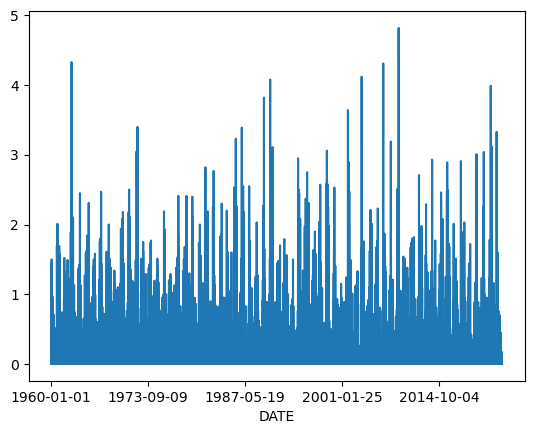

In [97]:
core_weather["precip"].plot()

In [98]:
core_weather["precip"] = core_weather["precip"].fillna(0)

In [99]:
core_weather.apply(pd.isnull).sum()

precip           0
snow          6017
snow_depth    6039
temp_max        14
temp_min        14
dtype: int64

In [100]:
core_weather["snow"] = core_weather["snow"].fillna(0)

In [101]:
core_weather["snow_depth"] = core_weather["snow_depth"].fillna(0)

In [102]:
core_weather.apply(pd.isnull).sum()

precip         0
snow           0
snow_depth     0
temp_max      14
temp_min      14
dtype: int64

In [103]:
core_weather[pd.isnull(core_weather["temp_max"])]

,precip,snow,snow_depth,temp_max,temp_min
DATE,,,,,
1996-12-26,0.00,0.0,0.0,NaN,NaN
1996-12-27,0.00,0.0,0.0,NaN,NaN
1997-04-06,0.00,0.0,0.0,NaN,28.0
1997-04-12,0.00,0.0,0.0,NaN,28.0
1997-04-13,0.39,0.0,0.0,NaN,NaN
1997-04-14,0.35,0.0,0.0,NaN,NaN
1997-05-07,0.00,0.0,0.0,NaN,NaN
1997-05-08,0.00,0.0,0.0,NaN,NaN
1997-05-09,0.00,0.0,0.0,NaN,NaN


In [104]:
core_weather = core_weather.fillna(method="ffill")

In [105]:
core_weather

,precip,snow,snow_depth,temp_max,temp_min
DATE,,,,,
1960-01-01,0.00,0.0,0.0,39.0,18.0
1960-01-02,0.02,0.2,0.0,35.0,27.0
1960-01-03,0.00,0.0,0.0,36.0,22.0
1960-01-04,0.01,0.1,0.0,35.0,28.0
1960-01-05,0.13,0.0,0.0,39.0,33.0
...,...,...,...,...,...
2023-08-08,0.00,0.0,0.0,84.0,52.0
2023-08-09,0.17,0.0,0.0,74.0,55.0
2023-08-10,0.00,0.0,0.0,74.0,55.0


In [106]:
# Check for missing value defined in data documentation
core_weather.apply(lambda x: (x == 9999).sum())

precip        0
snow          0
snow_depth    0
temp_max      0
temp_min      0
dtype: int64

In [107]:

core_weather.dtypes

precip        float64
snow          float64
snow_depth    float64
temp_max      float64
temp_min      float64
dtype: object

In [108]:
core_weather.index

Index(['1960-01-01', '1960-01-02', '1960-01-03', '1960-01-04', '1960-01-05',
       '1960-01-06', '1960-01-07', '1960-01-08', '1960-01-09', '1960-01-10',
       ...
       '2023-08-03', '2023-08-04', '2023-08-05', '2023-08-06', '2023-08-07',
       '2023-08-08', '2023-08-09', '2023-08-10', '2023-08-11', '2023-08-12'],
      dtype='object', name='DATE', length=23235)

In [109]:
core_weather.index = pd.to_datetime(core_weather.index)

In [110]:

core_weather.index

DatetimeIndex(['1960-01-01', '1960-01-02', '1960-01-03', '1960-01-04',
               '1960-01-05', '1960-01-06', '1960-01-07', '1960-01-08',
               '1960-01-09', '1960-01-10',
               ...
               '2023-08-03', '2023-08-04', '2023-08-05', '2023-08-06',
               '2023-08-07', '2023-08-08', '2023-08-09', '2023-08-10',
               '2023-08-11', '2023-08-12'],
              dtype='datetime64[ns]', name='DATE', length=23235, freq=None)

In [111]:
core_weather.index.year

Int64Index([1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960,
            ...
            2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023],
           dtype='int64', name='DATE', length=23235)

In [112]:
core_weather.index.month

Int64Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            ...
            8, 8, 8, 8, 8, 8, 8, 8, 8, 8],
           dtype='int64', name='DATE', length=23235)

In [113]:
core_weather.index.day_of_week

Int64Index([4, 5, 6, 0, 1, 2, 3, 4, 5, 6,
            ...
            3, 4, 5, 6, 0, 1, 2, 3, 4, 5],
           dtype='int64', name='DATE', length=23235)

<Axes: xlabel='DATE'>

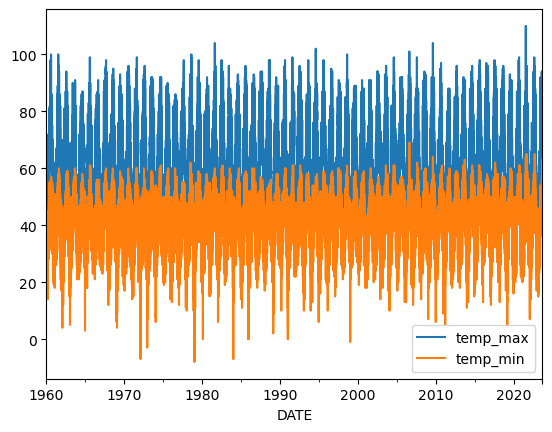

In [114]:
core_weather[["temp_max", "temp_min"]].plot()

In [115]:
core_weather.index.year.value_counts().sort_index()

1960    366
1961    365
1962    365
1963    365
1964    366
       ... 
2019    365
2020    366
2021    365
2022    365
2023    224
Name: DATE, Length: 64, dtype: int64

<Axes: xlabel='DATE'>

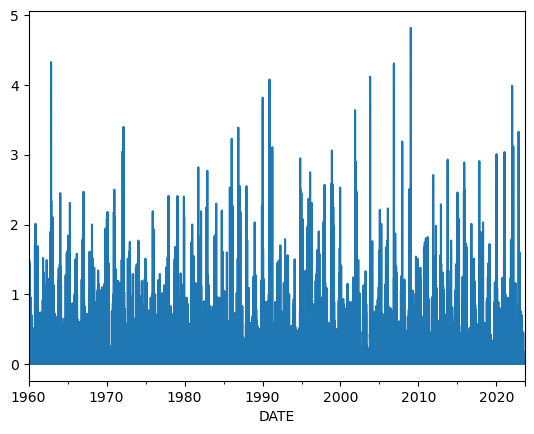

In [116]:
core_weather["precip"].plot()

<Axes: xlabel='DATE'>

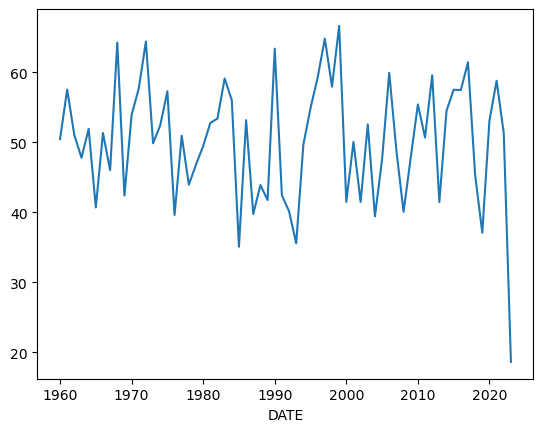

In [117]:
core_weather.groupby(core_weather.index.year).apply(lambda x: x["precip"].sum()).plot()

In [118]:
core_weather["target"] = core_weather.shift(-1)["temp_min"]

In [134]:
core_weather["week_min_avg"] = core_weather["temp_min"].rolling(7).mean()
core_weather["week_min"] = core_weather["temp_min"].rolling(7).min()
core_weather["month_min_avg"] = core_weather["temp_min"].rolling(30).mean()
core_weather["month_min"] = core_weather["temp_min"].rolling(30).min()

core_weather["day"] = core_weather.index.day
core_weather["month"] = core_weather.index.month

core_weather["precip_week_avg"]= core_weather["precip"].rolling(7).mean()
core_weather["precip_month_avg"] = core_weather["precip"].rolling(30).mean()

#core_weather["month_day_min"] = core_weather["month_min"] / core_weather["temp_min"]
#core_weather["max_min"] = core_weather["temp_max"] - core_weather["temp_min"]

In [136]:
core_weather

,precip,snow,snow_depth,temp_max,temp_min,target,week_min_avg,month_min_avg,week_min,month_min,month,day,precip_week_avg,precip_month_avg
DATE,,,,,,,,,,,,,,
1960-01-01,0.00,0.0,0.0,39.0,18.0,27.0,NaN,NaN,NaN,NaN,1,1,NaN,NaN
1960-01-02,0.02,0.2,0.0,35.0,27.0,22.0,NaN,NaN,NaN,NaN,1,2,NaN,NaN
1960-01-03,0.00,0.0,0.0,36.0,22.0,28.0,NaN,NaN,NaN,NaN,1,3,NaN,NaN
1960-01-04,0.01,0.1,0.0,35.0,28.0,33.0,NaN,NaN,NaN,NaN,1,4,NaN,NaN
1960-01-05,0.13,0.0,0.0,39.0,33.0,36.0,NaN,NaN,NaN,NaN,1,5,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-08,0.00,0.0,0.0,84.0,52.0,55.0,55.000000,50.933333,48.0,45.0,8,8,0.002857,0.001667
2023-08-09,0.17,0.0,0.0,74.0,55.0,55.0,56.000000,51.033333,51.0,45.0,8,9,0.027143,0.007333
2023-08-10,0.00,0.0,0.0,74.0,55.0,51.0,56.571429,51.233333,52.0,45.0,8,10,0.027143,0.007333


In [137]:
core_weather = core_weather.iloc[:-1,:].copy()

In [138]:
core_weather = core_weather.iloc[30:,:].copy()

In [139]:
core_weather

,precip,snow,snow_depth,temp_max,temp_min,target,week_min_avg,month_min_avg,week_min,month_min,month,day,precip_week_avg,precip_month_avg
DATE,,,,,,,,,,,,,,
1960-01-31,0.03,0.0,0.0,51.0,33.0,42.0,35.571429,30.733333,29.0,17.0,1,31,0.407143,0.211667
1960-02-01,0.13,0.0,0.0,51.0,42.0,40.0,36.285714,31.233333,29.0,17.0,2,1,0.338571,0.215333
1960-02-02,0.55,0.0,0.0,50.0,40.0,40.0,36.285714,31.833333,29.0,17.0,2,2,0.405714,0.233667
1960-02-03,0.28,0.0,0.0,49.0,40.0,42.0,37.571429,32.233333,29.0,17.0,2,3,0.431429,0.242667
1960-02-04,0.10,0.0,0.0,55.0,42.0,32.0,39.428571,32.533333,33.0,17.0,2,4,0.231429,0.241667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-07,0.00,0.0,0.0,80.0,58.0,52.0,54.428571,50.700000,48.0,45.0,8,7,0.002857,0.001667
2023-08-08,0.00,0.0,0.0,84.0,52.0,55.0,55.000000,50.933333,48.0,45.0,8,8,0.002857,0.001667
2023-08-09,0.17,0.0,0.0,74.0,55.0,55.0,56.000000,51.033333,51.0,45.0,8,9,0.027143,0.007333


In [140]:
core_weather.apply(pd.isna).sum()

precip              0
snow                0
snow_depth          0
temp_max            0
temp_min            0
target              0
week_min_avg        0
month_min_avg       0
week_min            0
month_min           0
month               0
day                 0
precip_week_avg     0
precip_month_avg    0
dtype: int64

In [142]:
core_weather.columns

Index(['precip', 'snow', 'snow_depth', 'temp_max', 'temp_min', 'target',
       'week_min_avg', 'month_min_avg', 'week_min', 'month_min', 'month',
       'day', 'precip_week_avg', 'precip_month_avg'],
      dtype='object')

In [141]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error

reg = Ridge(alpha=.1)

In [202]:
predictors = ['precip', 'snow', 'snow_depth', 'temp_max', 'temp_min', 'week_min_avg', 'month_min_avg', 
              'week_min', 'month_min', 'month', 'precip_week_avg', 'precip_month_avg']

In [203]:
def create_predictions(predictors, core_weather, reg):
    train = core_weather.loc[:"2020-12-31"]
    test = core_weather.loc["2021-01-01":]

    reg.fit(train[predictors], train["target"])
    predictions = reg.predict(test[predictors])

    error = mean_absolute_error(test["target"], predictions)
    
    combined = pd.concat([test["target"], pd.Series(predictions, index=test.index)], axis=1)
    combined.columns = ["actual", "predictions"]
    return error, combined

In [204]:
error, combined = create_predictions(predictors, core_weather, reg)
error

3.6134568489075964

In [205]:
reg.coef_

array([ 1.04128425e+00, -2.90360226e-01, -2.75480961e-02,  1.69512815e-01,
        6.08111213e-01, -8.30872619e-02,  1.23516994e-01,  5.27961174e-02,
       -1.60362141e-02,  1.34295451e-03,  6.47762425e-02, -1.62147442e+00])

<Axes: xlabel='DATE'>

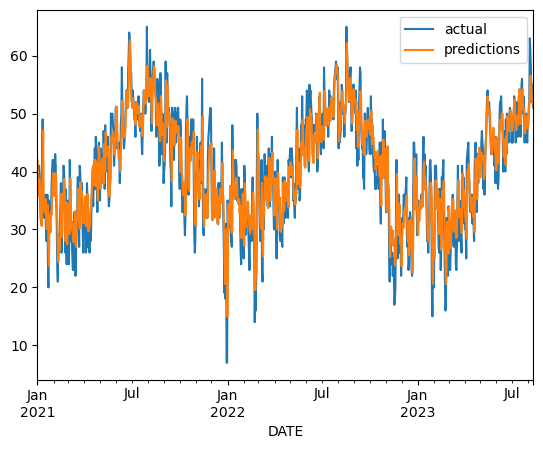

In [206]:
combined.plot()

In [207]:
core_weather.corr()["target"]

precip             -0.018242
snow               -0.116746
snow_depth         -0.138568
temp_max            0.716893
temp_min            0.829189
target              1.000000
week_min_avg        0.733071
month_min_avg       0.691666
week_min            0.715860
month_min           0.668876
month               0.171773
day                 0.006804
precip_week_avg    -0.234214
precip_month_avg   -0.479430
Name: target, dtype: float64

In [208]:
predictors = ['temp_max', 'temp_min', 'week_min_avg', 'month_min_avg', 'week_min', 'month_min']

In [209]:
error, combined = create_predictions(predictors, core_weather, reg)
error

3.596005207952743

In [210]:
reg.coef_

array([ 0.16778398,  0.62852138, -0.08322258,  0.11729187,  0.04770947,
       -0.0141306 ])

In [211]:
combined["diff"] = (combined["actual"] - combined["predictions"]).abs()

In [218]:
combined.sort_values("diff", ascending=False)

,actual,predictions,diff
DATE,,,
2021-12-30,7.0,30.199785,23.199785
2022-01-01,35.0,14.915004,20.084996
2022-01-10,48.0,29.761425,18.238575
2021-11-13,56.0,38.172238,17.827762
2022-03-08,23.0,38.330939,15.330939
...,...,...,...
2021-04-15,36.0,35.967121,0.032879
2022-11-02,33.0,33.032435,0.032435
2021-09-12,48.0,47.969766,0.030234
